I understood that the task is:
-build a linear classifier using only LogisticRegression without transforming the data.
Maybe I've been a bit too creative...

My solution divides training data into quadrats and for each quadrand it performs LogisticRegression, resulting probability maps elements are multiplied and renormalized.

Default settings and imports

In [37]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Creating the dataset

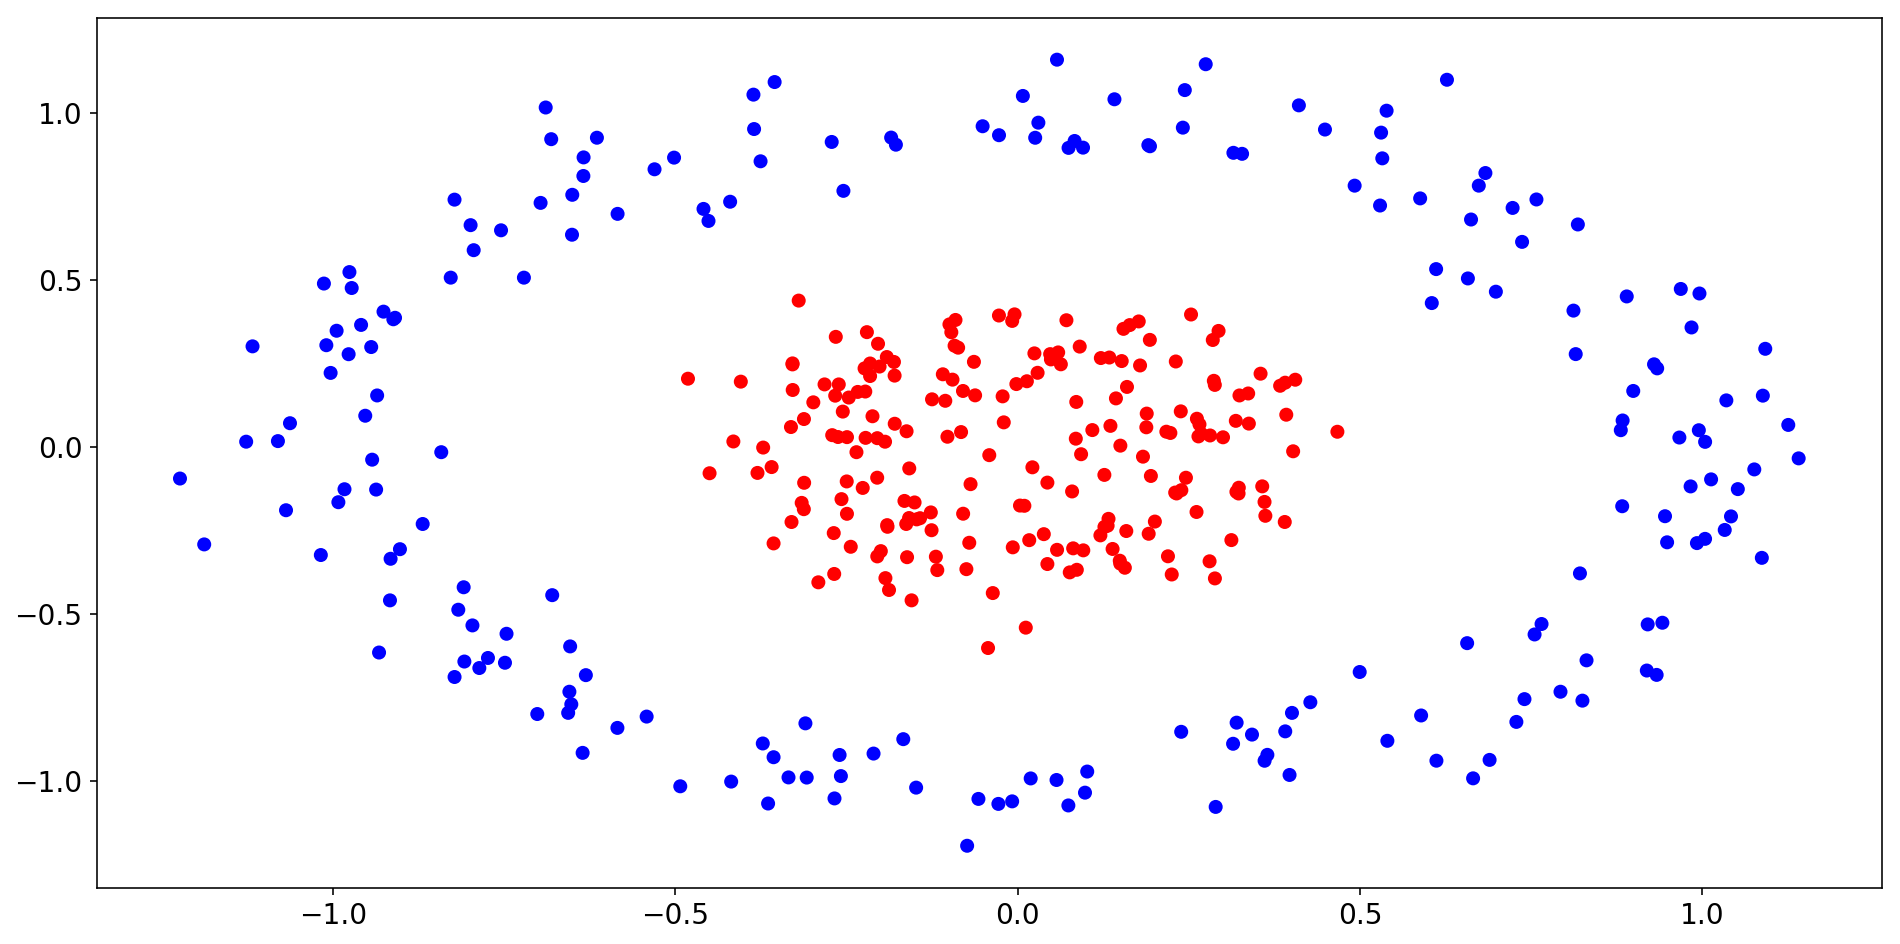

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y > 0.5))

plt.scatter(X[:,0], X[:,1], c=y)


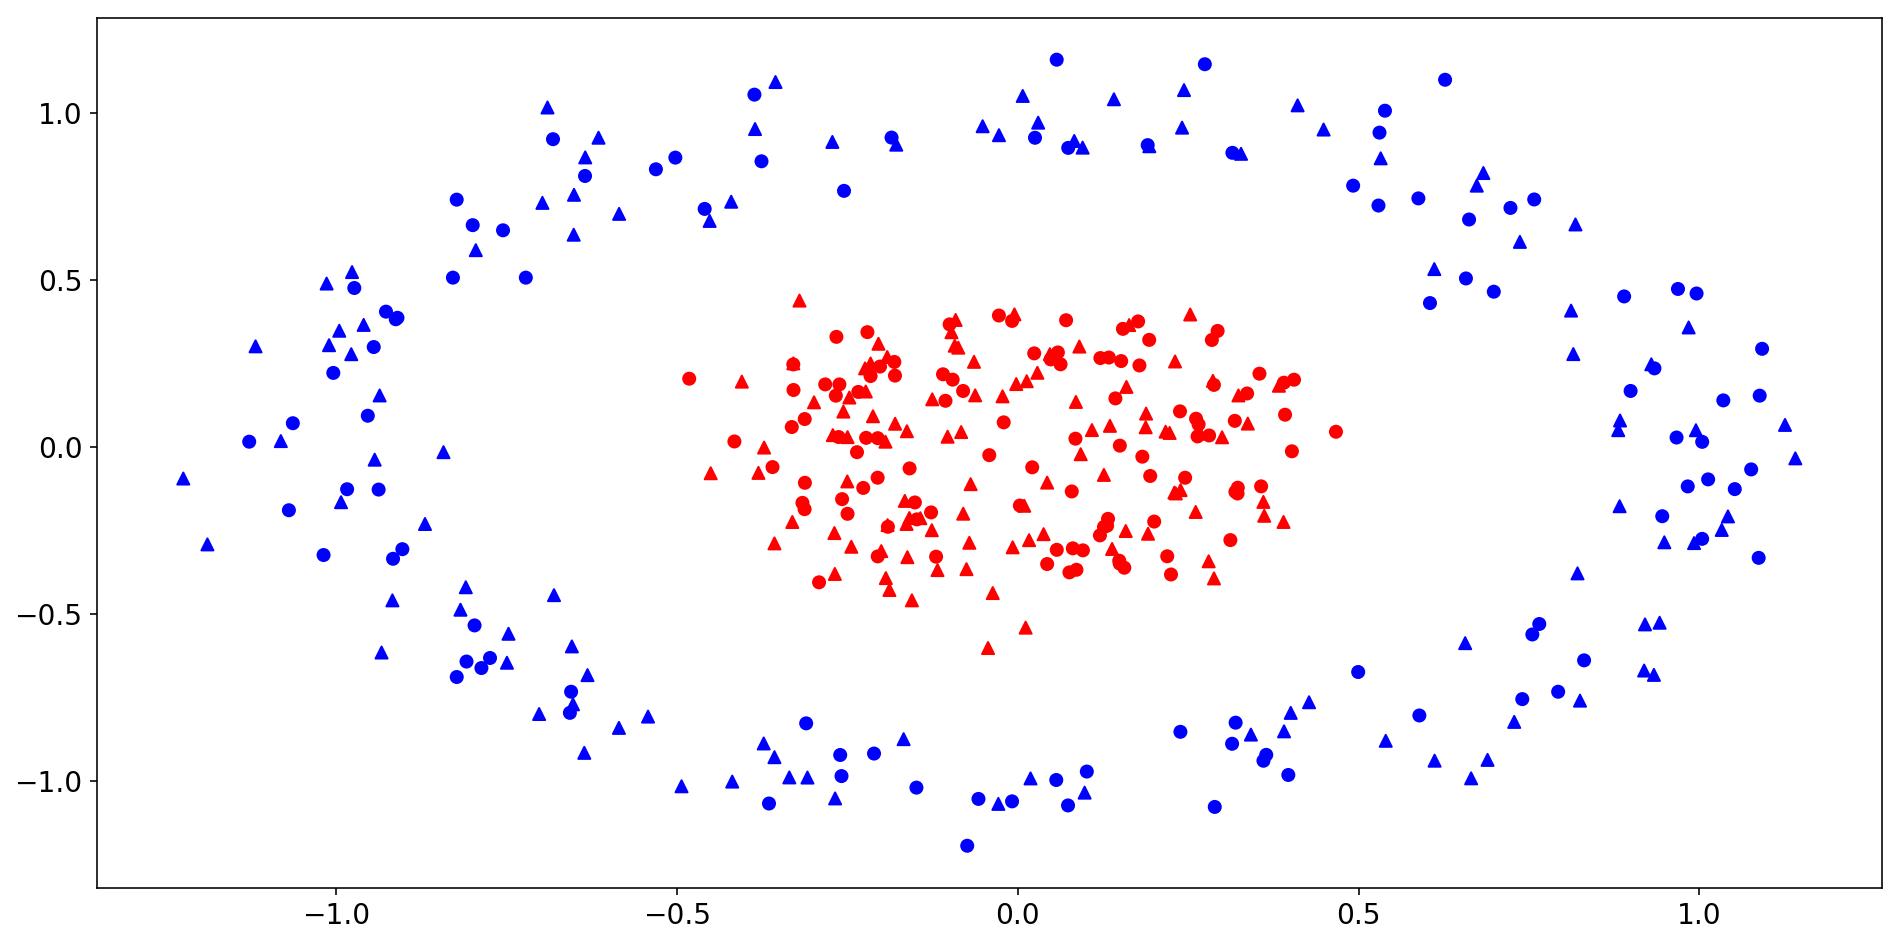

In [39]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^')


In [40]:
LoR = LogisticRegression()
LoR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
from matplotlib.colors import ListedColormap
import operator

def get_truth(inp, relate, cut):
    ops = {'>': operator.gt,
           '<': operator.lt,
           '>=': operator.ge,
           '<=': operator.le,
           '=': operator.eq}
    return ops[relate](inp, cut)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

def UseArtificialClasiffier(X, y, QuandrandIndex, Comparator):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
 
    X_train_Kvadrand = np.asarray( [t for t in X_train if (get_truth(t[QuandrandIndex], Comparator, 0))] )
    y_train_Kvadrand = np.asarray( [y_train[i] for i in range(0,len(X_train)) if (get_truth(X_train[i,QuandrandIndex], Comparator, 0)) ] )

    MLoR = LogisticRegression()
    MLoR.fit(X_train_Kvadrand, y_train_Kvadrand)
    
    Z = MLoR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    return Z



In [88]:
Z0=UseArtificialClasiffier(X, y,0,'<')
Z1=UseArtificialClasiffier(X, y,1,'<')
Z2=UseArtificialClasiffier(X, y,0,'>')
Z3=UseArtificialClasiffier(X, y,1,'>')

Z = (Z0*Z1*Z2*Z3)/np.amax(Z)


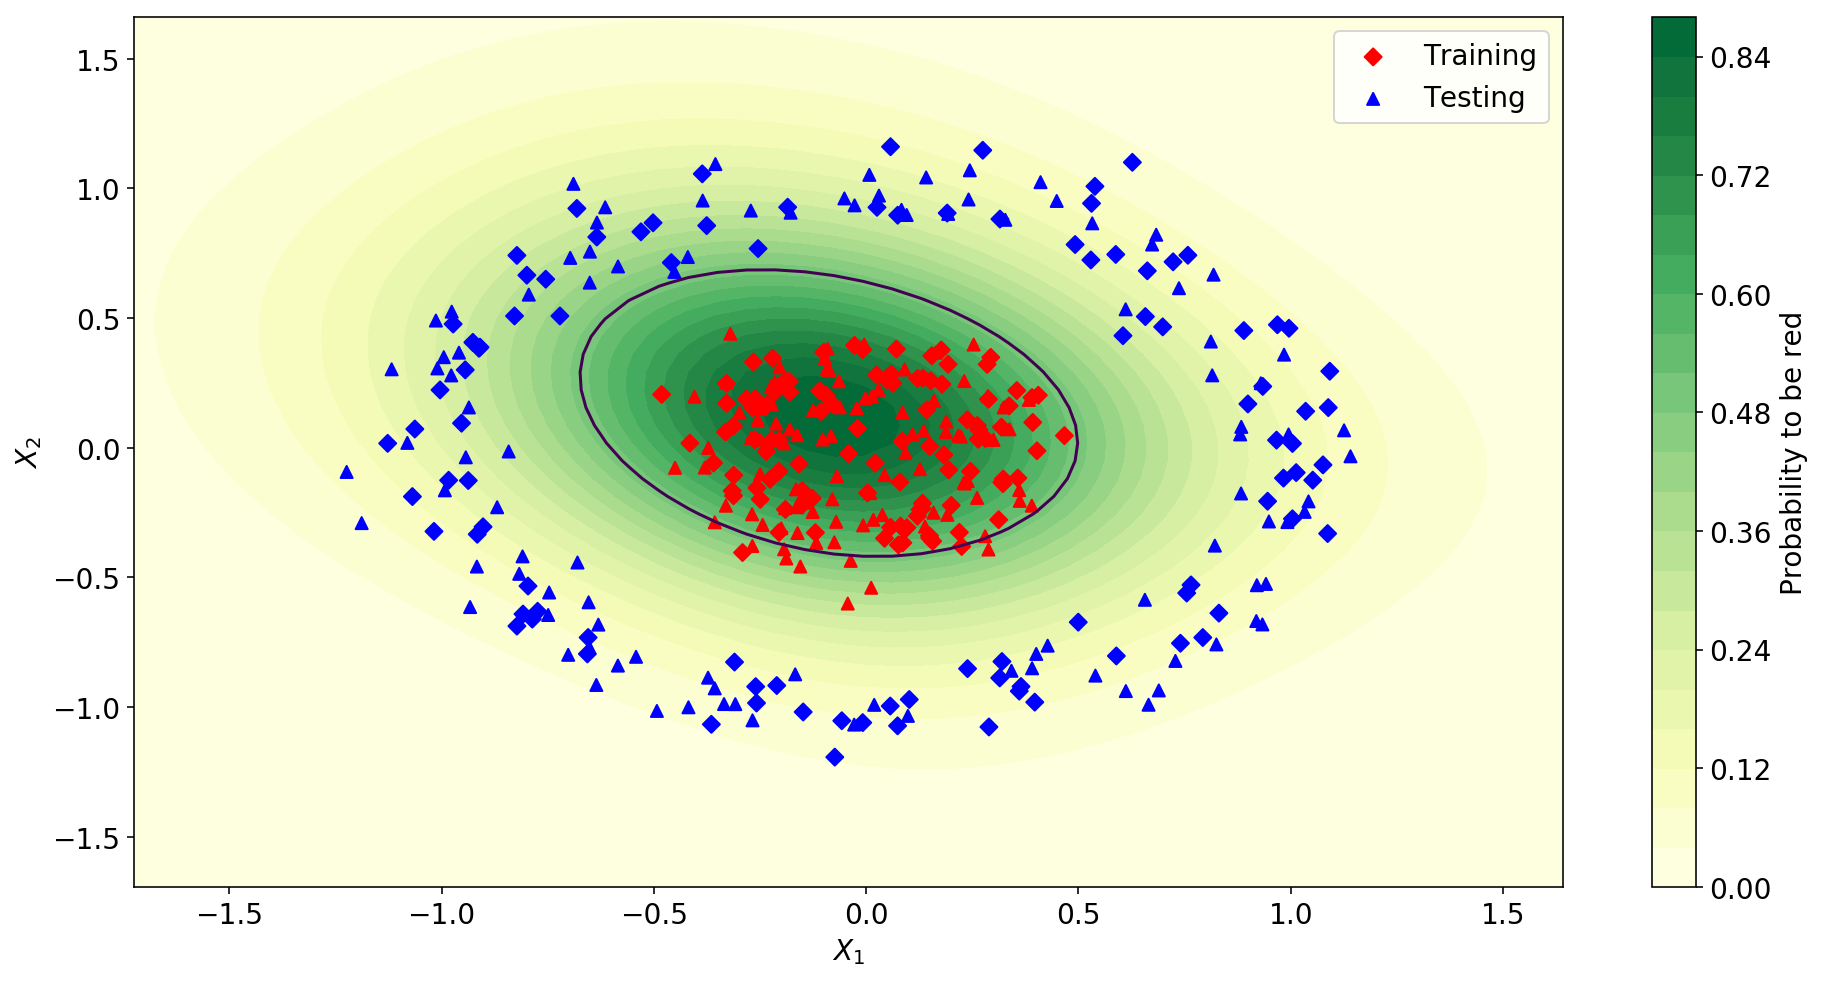

In [89]:
mpt=plt.contourf(xx, yy, Z , 25, cmap="YlGn", vmin=0, vmax=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");
plt.colorbar(mpt, label="Probability to be red")
plt.legend(loc='best')
plt.contour(xx, yy, Z, levels=[.5])